In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = np.load('data.npy')

In [3]:
target = np.load('target.npy')
target = tf.keras.utils.to_categorical(target) # converting [1,0,1,1,0...] to [[1,0],[0,1],[1,0]] i.e categorical
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

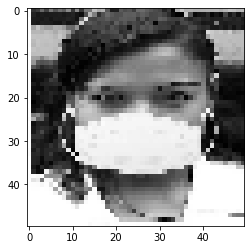

In [4]:
plt.imshow(data[890],cmap='gray')

In [5]:
target[890]

array([0., 1.], dtype=float32)

In [6]:
# we need to create a 3D image since our image have only one channel as its a greyscale img.
# so we will just replicate the image 3 times to create a 3d image.
# https://www.tensorflow.org/api_docs/python/tf/image/grayscale_to_rgb
# why RESHAPE - https://github.com/tensorflow/tensorflow/issues/26324 
# preprocessing
odata = data.copy()
ndata = []
for i in odata:
    image = i.reshape((*i.shape,1)) # as tf.image.grayscale_to_rgb requires last dimension to be 1, see why reshape link
    image = tf.convert_to_tensor(image)  # as tf.image.grayscale_to_rgb requires tensor for processing.
    ndata.append(tf.image.grayscale_to_rgb(image).numpy()/255.)

data = ndata.copy()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
np.shape(data)

(1376, 50, 50, 3)

In [9]:
trainx, testx, trainy, testy = train_test_split(data,
                                                target,
                                                test_size=0.15,
                                                random_state=345,
                                                shuffle=True)

trainx = np.array(trainx)
testx = np.array(testx)

In [10]:
trainy.shape

(1169, 2)

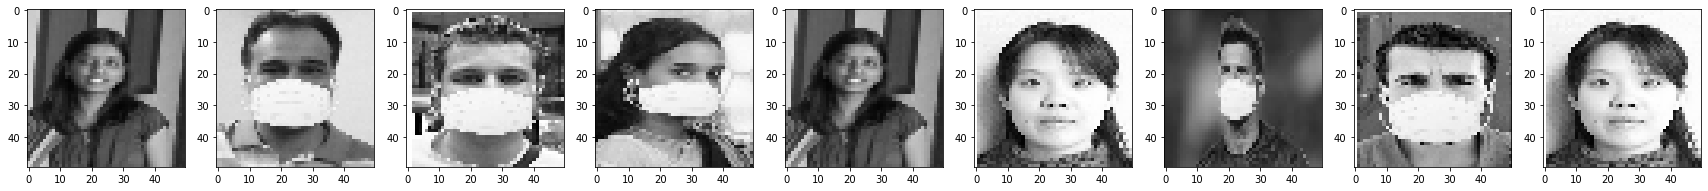

In [13]:
plt.figure(figsize=[30,30])
for i in np.arange(1,10):
    plt.subplot(int(f"19{i}"))
    plt.imshow(trainx[np.random.randint(0,25)], cmap='gray')

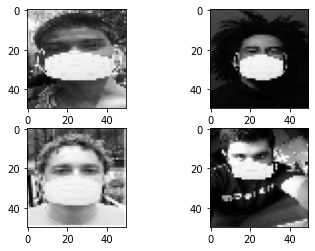

In [14]:
plt.subplot(221)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(222)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(223)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(224)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')

In [15]:
trainy[0]

array([0., 1.], dtype=float32)

In [16]:
img_shape = trainx[0].shape
img_shape  

(50, 50, 3)

In [17]:
model=Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=img_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories


adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation (Activation)      (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
activation_1 (Activation)    (None, 9, 9, 128)         0

In [19]:
history = model.fit(x=trainx,
                    y=trainy,
                    batch_size=100,
                    epochs=50,
                    validation_split=0.2,
                    verbose=2,
                    shuffle=True)

Epoch 1/50
10/10 - 5s - loss: 0.6873 - accuracy: 0.5487 - val_loss: 0.6730 - val_accuracy: 0.4829
Epoch 2/50
10/10 - 3s - loss: 0.6534 - accuracy: 0.6053 - val_loss: 0.5786 - val_accuracy: 0.8632
Epoch 3/50
10/10 - 2s - loss: 0.5278 - accuracy: 0.7658 - val_loss: 0.3771 - val_accuracy: 0.8504
Epoch 4/50
10/10 - 3s - loss: 0.3632 - accuracy: 0.8503 - val_loss: 0.2594 - val_accuracy: 0.9060
Epoch 5/50
10/10 - 2s - loss: 0.2685 - accuracy: 0.9016 - val_loss: 0.2359 - val_accuracy: 0.9145
Epoch 6/50
10/10 - 2s - loss: 0.2182 - accuracy: 0.9166 - val_loss: 0.2009 - val_accuracy: 0.9145
Epoch 7/50
10/10 - 2s - loss: 0.1896 - accuracy: 0.9348 - val_loss: 0.1960 - val_accuracy: 0.9231
Epoch 8/50
10/10 - 3s - loss: 0.1644 - accuracy: 0.9476 - val_loss: 0.1895 - val_accuracy: 0.9188
Epoch 9/50
10/10 - 3s - loss: 0.1187 - accuracy: 0.9701 - val_loss: 0.1290 - val_accuracy: 0.9530
Epoch 10/50
10/10 - 3s - loss: 0.0922 - accuracy: 0.9701 - val_loss: 0.0903 - val_accuracy: 0.9615
Epoch 11/50
10/10 -

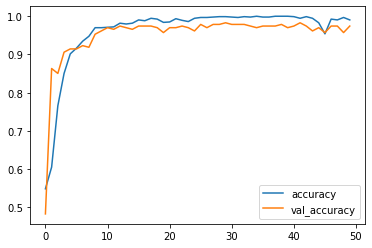

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

In [21]:
model.evaluate(testx, testy)

7/7 [==============================] - 0s 24ms/step - loss: 0.1552 - accuracy: 0.9614


[0.15519556403160095, 0.9613526463508606]

In [22]:
model.save('cnn.h5')